# Directory configuration

In [1]:
from google.colab import drive  
drive._mount('/content/drive')

Mounted at /content/drive


# **Model definition**

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate

In [3]:
inputs = Input((512, 512, 3))
s = Lambda(lambda x: x / 255)(inputs) #normalize matrix to make it bw 0 and 1 for ease of computation

#Contraction path
c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
 
c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
 
c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [4]:
def get_model():
  return model

# Importing the required libraries

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import load,save
import glob
import cv2    

# **Data Loading**

In [6]:
def get_image_array(fn):
    image = cv2.imread(fn)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# imread reads in BGR so to convert to RGB
def get_mask_array(fn):
    image = cv2.imread(fn)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# BGR to gray scale

In [ ]:
train_images = []
train_masks = []
i = 0
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/ML project/train"):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    path = (img_path.split('/'))
    name = path[-1].split('.')
    img_name = name[0]
    img = get_image_array(img_path)
    img = cv2.resize(img,(512,512))
    train_images.append(img)
    print(i)

    # INTER NEAREST copies nearest values to new pixel values - imp while upscaling 
    train_mask_path = "/content/drive/MyDrive/Colab Notebooks/ML project/train_label"
    train_mask_path = train_mask_path + '/' + img_name + '_label' + '.png'
    img = get_mask_array(train_mask_path)
    img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_NEAREST)
    train_masks.append(img)
    print(i)
    i += 1

In [ ]:
val_images = []
val_masks = []
i = 0
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/ML project/val"):
  for img_path in glob.glob(os.path.join(directory_path, "*.png")):
    path = (img_path.split('/'))
    name = path[-1].split('.')
    img_name = name[0]
    img = get_image_array(img_path)
    img = cv2.resize(img,(512,512))
    val_images.append(img)
    print(i)

    val_mask_path = "/content/drive/MyDrive/Colab Notebooks/ML project/val_label"
    val_mask_path = val_mask_path + '/' + img_name + '_label' + '.png'
    img = get_mask_array(val_mask_path)
    img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_NEAREST)
    val_masks.append(img)
    print(i)
    i += 1

In [ ]:
print(val_mask_path)
print(img_path)

/content/drive/MyDrive/Colab Notebooks/ML project/val_label/Town04_Clear_Noon_09_09_2020_14_57_22_frame_671_validation_set_label.png
/content/drive/MyDrive/Colab Notebooks/ML project/val/Town04_Clear_Noon_09_09_2020_14_57_22_frame_671_validation_set.png


In [ ]:
'''path = (img_path.split('/'))
name = path[-1].split('.')
img_name = name[0]
train_mask_path = "/content/drive/MyDrive/Colab Notebooks/ML project/train_label"
train_mask_path = train_mask_path + '/' + img_name + '_label' + '.png'
print(train_mask_path)'''


/content/drive/MyDrive/Colab Notebooks/ML project/train_label/Town04_Clear_Noon_09_09_2020_14_57_22_frame_1951_label_label.png


In [ ]:
train_images=np.array(train_images)
print(train_images.shape)
train_masks=np.array(train_masks)
print(train_masks.shape)
print(np.unique(train_masks))
val_images = np.array(val_images)
val_masks = np.array(val_masks)
save('/content/drive/MyDrive/Colab Notebooks/ML project/train_numpy/train_images.npy',train_images)
save('/content/drive/MyDrive/Colab Notebooks/ML project/train_numpy/train_masks.npy',train_masks)
save('/content/drive/MyDrive/Colab Notebooks/ML project/val_numpy/val_images.npy',val_images)
save('/content/drive/MyDrive/Colab Notebooks/ML project/val_numpy/val_masks.npy',val_masks)

In [8]:
train_images = load('/content/drive/MyDrive/Colab Notebooks/ML project/train_numpy/train_images.npy')
train_masks = load('/content/drive/MyDrive/Colab Notebooks/ML project/train_numpy/train_masks.npy')

In [9]:
val_images = load('/content/drive/MyDrive/Colab Notebooks/ML project/val_numpy/val_images.npy')
val_masks = load('/content/drive/MyDrive/Colab Notebooks/ML project/val_numpy/val_masks.npy')

In [10]:
print(train_images.shape)
print(train_masks.shape)
print(type(train_masks))
print(val_images.shape)
print(val_masks.shape)
print(type(val_masks))

(3075, 512, 512, 3)
(3075, 512, 512)
<class 'numpy.ndarray'>
(129, 512, 512, 3)
(129, 512, 512)
<class 'numpy.ndarray'>


# **Visualisation**

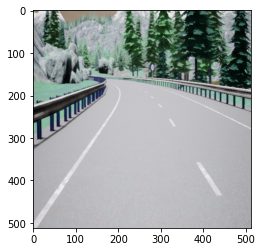

In [14]:
# pick the first image from the training directory and show it
plt.imshow(train_images[0]);

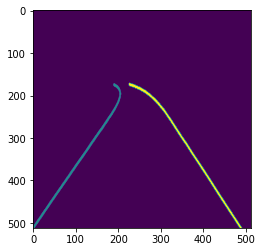

In [15]:
plt.imshow(train_masks[0])

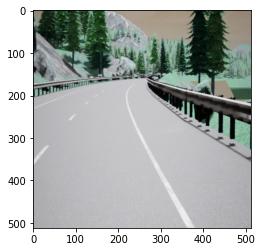

In [16]:
plt.imshow(val_images[55]);

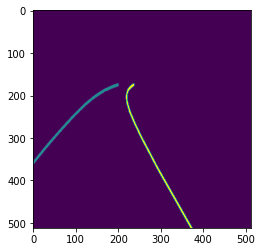

In [17]:
plt.imshow(val_masks[55])

# **Model and training**

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras import backend as K
def dice_coefficient(y_true, y_pred, epsilon=0.00001):

    """
    Compute dice coefficient for single class.

    Args:
        y_true (Tensorflow tensor): tensor of ground truth values for single class.
                                    shape: (x_dim, y_dim, z_dim)
        y_pred (Tensorflow tensor): tensor of predictions for single class.
                                    shape: (x_dim, y_dim, z_dim)
        axis (tuple): spatial axes to sum over when computing numerator and
                      denominator of dice coefficient.
                      Hint: pass this as the 'axis' argument to the K.sum function.
        epsilon (float): small constant added to numerator and denominator to
                        avoid divide by 0 errors.
    Returns:
        dice_coefficient (float): computed value of dice coefficient.     
    """
    
    tf.cast(y_true, tf.uint8) # changing ip to unsigned int 8
    tf.cast(y_pred, tf.uint8) # we want ground truth and the mask to be of same type 
    # metric formula, accuracy is not good for segmentation
    dice_numerator = 2*(K.sum(y_true*y_pred)) + epsilon 
    dice_denominator = K.sum(y_true) + K.sum(y_pred) + epsilon
    dice_coefficient = (dice_numerator)/(dice_denominator)

    return dice_coefficient
    

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        # metric formula, accuracy is not good for segmentation
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

def soft_dice_loss(y_true, y_pred, epsilon=0.00001):
    """
    Compute mean soft dice loss over all abnormality classes.

    Args:
        y_true (Tensorflow tensor): tensor of ground truth values for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        y_pred (Tensorflow tensor): tensor of soft predictions for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        axis (tuple): spatial axes to sum over when computing numerator and
                      denominator in formula for dice loss.
                      Hint: pass this as the 'axis' argument to the K.sum
                            and K.mean functions.
        epsilon (float): small constant added to numerator and denominator to
                        avoid divide by 0 errors.
    Returns:
        dice_loss (float): computed value of dice loss.     
    """

    # loss function - update weights bw epochs
    tf.cast(y_true, tf.uint8)
    tf.cast(y_pred, tf.uint8)
    dice_numerator = 2*K.sum(y_true*y_pred) + epsilon
    dice_denominator = K.sum(y_true**2) + K.sum(y_pred**2) + epsilon 
    dice_loss = 1-(K.mean(dice_numerator/dice_denominator))

    return dice_loss

In [20]:
model = get_model()
metrics = ["acc", tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), iou]
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt , metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
filepath="/content/drive/MyDrive/Colab Notebooks/ML project/Saved_Models_New/weights-improvement-{epoch:02d}-{val_iou:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_iou', verbose=1, save_best_only=True, mode='max')
# store value gotten for each epoch
csv_logger = CSVLogger("/content/drive/MyDrive/Colab Notebooks/ML project/Training_Log 1.csv", separator = ',', append = False)
callbacks_list = [checkpoint, csv_logger]

In [23]:
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_images, train_masks, 
                    batch_size=1, # lighter on the ram => increase will make updates to matrix after training the given batch of images
                    # more number of images need to be stored as weights - ram problem ; smaller batch size => slow
                    verbose=1, 
                    epochs=7,
                    validation_data=(val_images, val_masks),
                    callbacks = callbacks_list, 
                    shuffle = False
                    )

Epoch 1/7
3074/3075 [============================>.] - ETA: 0s - loss: 38.8623 - acc: 0.9461 - recall: 0.4236 - precision: 0.1269 - iou: 0.4850
Epoch 00001: val_iou improved from -inf to 0.57784, saving model to /content/drive/MyDrive/Colab Notebooks/ML project/Saved_Models_New/weights-improvement-01-0.58.hdf5
3075/3075 [==============================] - 150s 49ms/step - loss: 38.8590 - acc: 0.9461 - recall: 0.4236 - precision: 0.1270 - iou: 0.4851 - val_loss: 33.0927 - val_acc: 0.9855 - val_recall: 0.3552 - val_precision: 0.8241 - val_iou: 0.5778
Epoch 2/7
3074/3075 [============================>.] - ETA: 0s - loss: 32.8605 - acc: 0.9858 - recall: 0.4545 - precision: 0.8428 - iou: 0.6735
Epoch 00002: val_iou improved from 0.57784 to 0.62277, saving model to /content/drive/MyDrive/Colab Notebooks/ML project/Saved_Models_New/weights-improvement-02-0.62.hdf5
3075/3075 [==============================] - 149s 48ms/step - loss: 32.8590 - acc: 0.9858 - recall: 0.4545 - precision: 0.8428 - io

# **Metrics evaluation**

In [24]:
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML project/Saved_Models/weights-improvement-05-0.74.hdf5", compile = False)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt , metrics=metrics)

Enter the index: 100


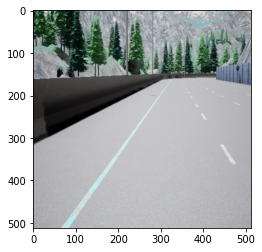

In [31]:
index = int(input('Enter the index: '))
img = val_images[index]
img = img.reshape((1, ) + img.shape)
pred = model.predict(img)
pred = np.array(pred)
pred = np.squeeze(pred)
plt.imshow(val_images[index])

Text(0.5, 1.0, 'Ground Truth')

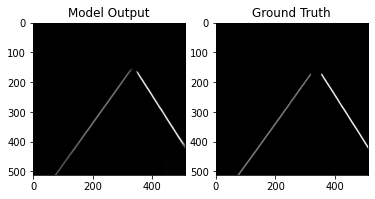

In [32]:
f, axarr = plt.subplots(1,2)
print()
axarr[0].imshow(pred, cmap = 'gray')
axarr[0].set_title('Model Output')
axarr[1].imshow(val_masks[index], cmap = 'gray')
axarr[1].set_title('Ground Truth')

Enter the index: 3


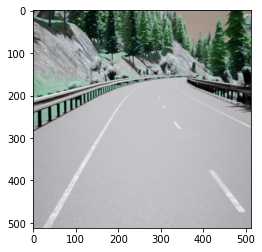

In [27]:
index = int(input('Enter the index: '))
img = val_images[index]
img = img.reshape((1, ) + img.shape)
pred = model.predict(img)
pred = np.array(pred)
pred = np.squeeze(pred)
plt.imshow(val_images[index])

Text(0.5, 1.0, 'Ground Truth')

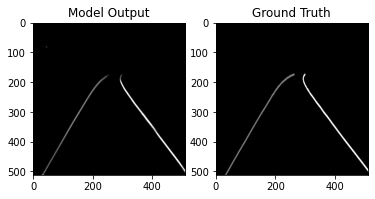

In [28]:
f, axarr = plt.subplots(1,2)
print()
axarr[0].imshow(pred, cmap = 'gray')
axarr[0].set_title('Model Output')
axarr[1].imshow(val_masks[index], cmap = 'gray')
axarr[1].set_title('Ground Truth')